# NYC Airbnb Host - 2021 Dataset

## This dataset was recently scraped by 'Inside Airbnb,' last year, and for this exercise I decided to download files for NYC Airbnb properties. The dataset includes coordination points (longtitude/latitiude) and categorical/numeric values that align with the purpose of this exercise.

## In terms of time series analysis, we can determine how long a host has been active and the date as to their last review. 

## Please see charts below and my review of this dataset, thanks!

URL: http://insideairbnb.com/get-the-data/
Last Compiled according to site: 04 December, 2021

In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import scipy

In [75]:
%matplotlib inline

In [76]:
path = r'/Users/carolinazea/OneDrive/CareerFoundry/Achievement 6'

In [130]:
df = pd.read_csv(os.path.join(path,'files', '2021_NYC_Airbnb_Data.csv'), index_col = False)

In [132]:
df.shape

(6716, 24)

In [96]:
df.columns

Index(['host_id', 'host_since', 'host_response_time', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'nyc_neighbourhood',
       'nyc_borough', 'latitude', 'longitude', 'property_type', 'room_type',
       'property_accommodates', 'property_bathrooms', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_365', 'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'instant_bookable'],
      dtype='object')

In [97]:
df.dtypes

host_id                     int64
host_since                 object
host_response_time         object
host_is_superhost          object
host_has_profile_pic       object
host_identity_verified     object
nyc_neighbourhood          object
nyc_borough                object
latitude                  float64
longitude                 float64
property_type              object
room_type                  object
property_accommodates       int64
property_bathrooms         object
price                       int64
minimum_nights              int64
maximum_nights              int64
has_availability           object
availability_365            int64
number_of_reviews           int64
first_review               object
last_review                object
review_scores_rating      float64
instant_bookable           object
dtype: object

In [131]:
df.head()

,host_id,host_since,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,nyc_neighbourhood,nyc_borough,latitude,longitude,...,price,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,instant_bookable
0,191091,8/4/10,Within A Few Hours,Superhost,Host has a Profile Picture,Host identity verified,Tribeca,Manhattan,40.72100,-74.00971,...,250,30,90,Host has availability,298,13,1/4/20,12/29/20,4.85,Host not instant bookable
1,244071,9/24/10,Within An Hour,Superhost,Host has a Profile Picture,Host identity verified,Ditmars Steinway,Queens,40.77868,-73.90652,...,140,4,1125,Host has availability,137,14,10/5/21,11/9/21,4.93,Host not instant bookable
2,503800,4/12/11,Within An Hour,Superhost,Host has a Profile Picture,Host identity verified,Crown Heights,Brooklyn,40.67654,-73.94629,...,101,1,14,Host has availability,128,16,5/20/21,11/7/21,4.88,Host instant bookable
3,262812,10/15/10,Within A Day,Not a Superhost,Host has a Profile Picture,Host identity verified,Williamsburg,Brooklyn,40.71983,-73.95992,...,250,30,90,Host has availability,77,57,5/5/19,12/11/19,4.45,Host not instant bookable
4,663384,6/4/11,Within A Day,Superhost,Host has a Profile Picture,Host identity verified,Park Slope,Brooklyn,40.67494,-73.97792,...,275,5,30,Host has availability,0,29,1/2/19,11/28/21,4.93,Host not instant bookable


In [99]:
df.describe()

,host_id,latitude,longitude,property_accommodates,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating
count,6.732000e+03,6732.000000,6732.000000,6732.000000,6732.000000,6732.000000,6732.000000,6732.000000,6732.000000,6732.000000
mean,1.721439e+08,40.727786,-73.954105,3.701277,250.193256,10.684046,543.278075,185.284462,19.863785,4.692729
std,1.463976e+08,0.051541,0.054444,2.289683,230.493446,16.743811,499.955947,128.179366,39.361552,0.533366
min,2.600000e+03,40.558930,-74.185800,1.000000,100.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,2.718154e+07,40.692000,-73.989460,2.000000,138.000000,2.000000,30.000000,67.000000,3.000000,4.600000
50%,1.493660e+08,40.727356,-73.965375,3.000000,185.000000,3.000000,365.000000,162.500000,8.000000,4.880000
75%,3.029034e+08,40.759873,-73.939255,4.000000,282.000000,30.000000,1125.000000,329.000000,22.000000,5.000000
max,4.331457e+08,40.908840,-73.710870,16.000000,5000.000000,365.000000,1125.000000,365.000000,1009.000000,5.000000


In [100]:
for col in df.columns.tolist():
    weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (df[weird]) > 0:
        print (col)

In [101]:
df.isnull().sum()

host_id                   0
host_since                0
host_response_time        0
host_is_superhost         0
host_has_profile_pic      0
host_identity_verified    0
nyc_neighbourhood         0
nyc_borough               0
latitude                  0
longitude                 0
property_type             0
room_type                 0
property_accommodates     0
property_bathrooms        0
price                     0
minimum_nights            0
maximum_nights            0
has_availability          0
availability_365          0
number_of_reviews         0
first_review              0
last_review               0
review_scores_rating      0
instant_bookable          0
dtype: int64

In [33]:
df_dups = df[df.duplicated()]

In [34]:
df_dups

,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,nyc_neighbourhood,nyc_borough,...,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,instant_bookable


In [133]:
df.corr()

,host_id,latitude,longitude,property_accommodates,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating
host_id,1.000000,0.051417,0.032741,0.064348,0.078824,-0.163976,-0.015072,0.134050,0.021970,-0.156956
latitude,0.051417,1.000000,-0.061469,-0.100377,0.041129,0.105706,0.003492,0.044684,-0.075757,-0.078228
longitude,0.032741,-0.061469,1.000000,0.198942,-0.151036,-0.113068,-0.029924,0.101723,0.054159,0.048251
property_accommodates,0.064348,-0.100377,0.198942,1.000000,0.394557,-0.060519,0.051887,0.121856,0.045279,-0.026535
price,0.078824,0.041129,-0.151036,0.394557,1.000000,-0.111831,0.071268,0.066172,-0.012151,0.007025
minimum_nights,-0.163976,0.105706,-0.113068,-0.060519,-0.111831,1.000000,0.142736,0.087696,-0.160806,-0.041912
maximum_nights,-0.015072,0.003492,-0.029924,0.051887,0.071268,0.142736,1.000000,0.091456,-0.001350,-0.010168
availability_365,0.134050,0.044684,0.101723,0.121856,0.066172,0.087696,0.091456,1.000000,0.025240,-0.133259
number_of_reviews,0.021970,-0.075757,0.054159,0.045279,-0.012151,-0.160806,-0.001350,0.025240,1.000000,0.047806
review_scores_rating,-0.156956,-0.078228,0.048251,-0.026535,0.007025,-0.041912,-0.010168,-0.133259,0.047806,1.000000


## Correlation Matrix Heatmap

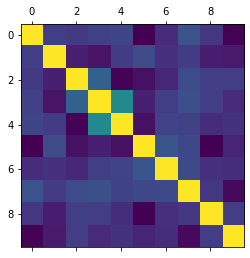

In [134]:
plt.matshow(df.corr())
plt.show()

In [136]:
df.columns

Index(['host_id', 'host_since', 'host_response_time', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'nyc_neighbourhood',
       'nyc_borough', 'latitude', 'longitude', 'property_type', 'room_type',
       'property_accommodates', 'property_bathrooms', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_365', 'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'instant_bookable'],
      dtype='object')

In [137]:
sub = df[['price','property_accommodates','minimum_nights', 'maximum_nights', 'availability_365', 'number_of_reviews', 'latitude', 'longitude']]


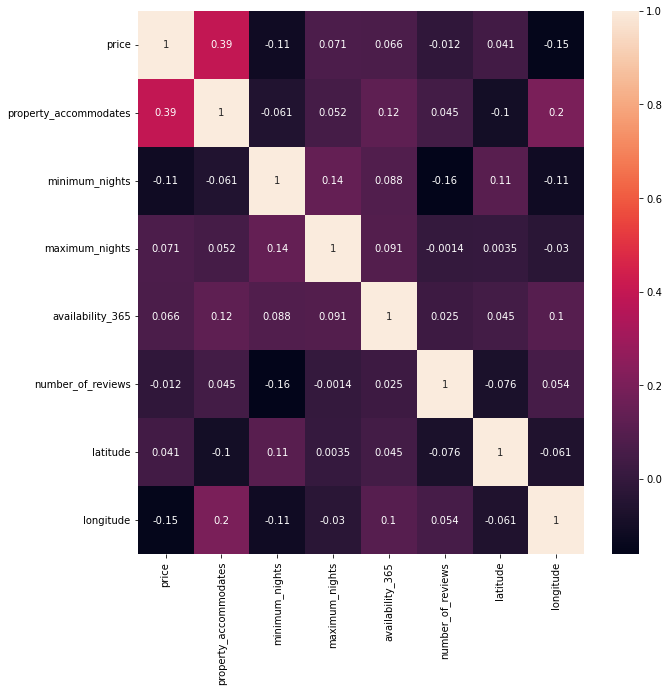

In [138]:
f,ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

### Discuss what the coefficients in the plot mean in terms of the relationships between the variables:

### As described in the previous exercise, coeffiecients closer to 1 indicates a moderate relationship. We can see from above that relationships between each other are not as strong compared to the 'price' and 'property_acccomadates' variable. This can be due to many reasons - the higher the price, the higher an Airbnb property can host or vice versa, the lower the price of a property, the lower amount of people allowed to occupy the property. 

### We can also see from the correaltion map that depending on the longtitude, the higher the price an Airbnb property can result in. This relationships between both variables equates to a .2 coefficient, which indicates a weak realtionship. Although this is not the ideal situation, with further analysis, I can indicate later on, on my analysis as to why that is. 

## Scatterplot 

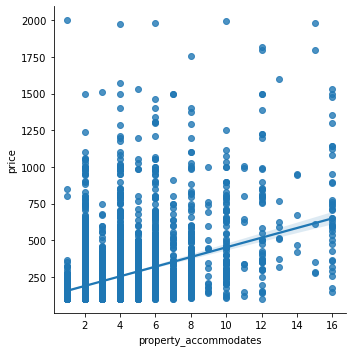

In [164]:
sns.lmplot(x = 'property_accommodates', y = 'price', data = df, palette='viridis')

## Discuss the output in a markdown cell:

### The strongest correlations resulted in variables: 'price' and 'property_accommodates' to have the coefficient of .39. The result is considered a moderate relationship nontheless, but when these two variables are configured in a scatterplot, I can indicate that the trend is a positive one. Not only is this a good indication for this analysis, this remarks that the variables in the dataset are influences by the price. Later on in this exercise, there are graphs which will indicate that price of an Airbnb property can be influenced by NYC neighborhoods.

In [169]:
sub_2 = sub[['price','property_accommodates','availability_365', 'number_of_reviews']]

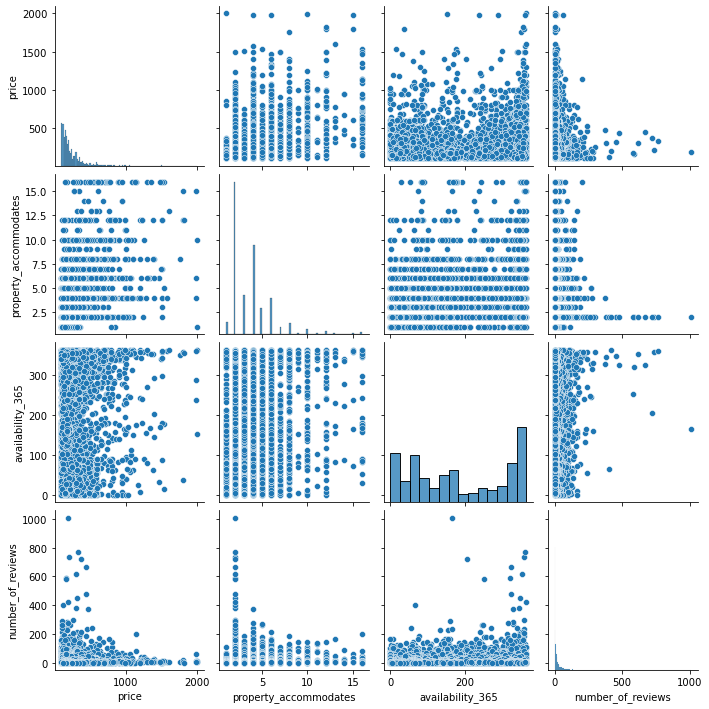

In [170]:
g = sns.pairplot(sub_2)

## Pair Plot of entire dataset

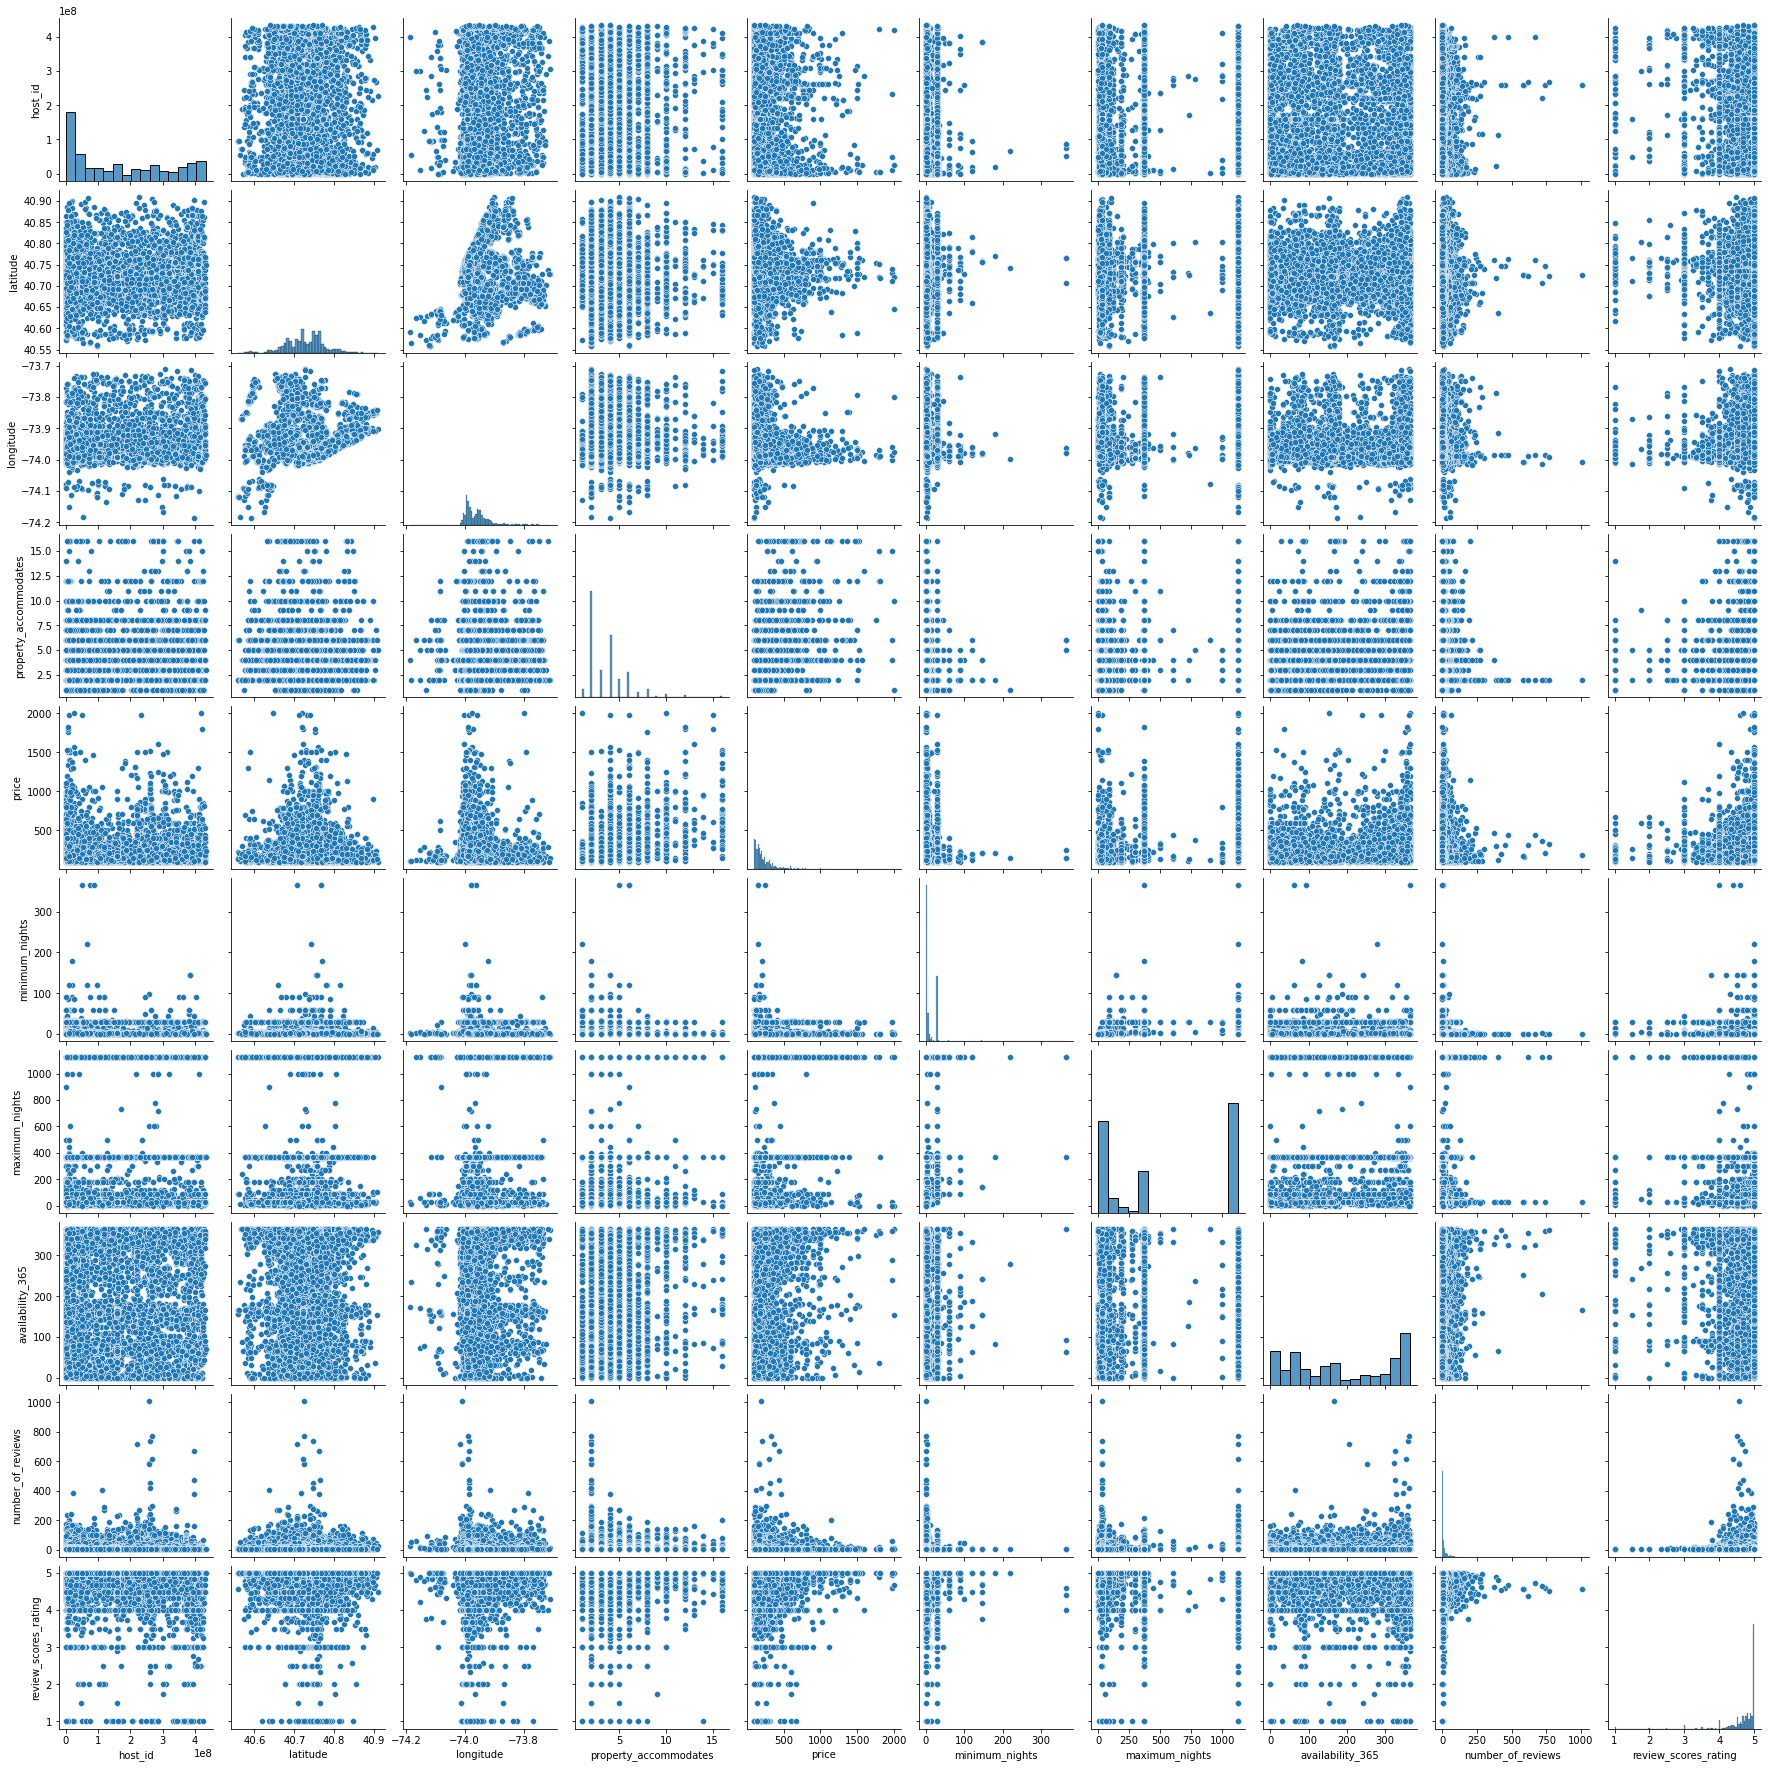

In [148]:
sns.pairplot(df, diag_kind="hist")

## Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why:

### I would like to explore these variables later on - price & review_scores_rating, in the exercises because I want to find out whether the higher the rating of an Airbnb host, does it influence the longevity of the price? 

### Another set of variables I want to dig in to is, 'number_of_reviews' and 'host_id.' I want to further investigate as to what NYC borough and neighborhood can indicate where people rented the most, thereby giving more host reviews. This scatterplot is indicative of numeric variables, later on in the exercises, I would like to see categorical variables combined with numeric variables, and how that can highlight different analysis. 

## Categorical Plots 

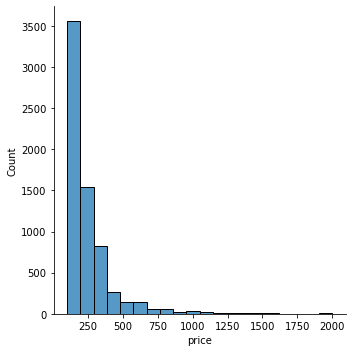

In [156]:
sns.displot(df['price'], bins = 20, color)

## Create a categorical plot and interpret the results.

### The cateogorical plot above further indicates that people are renting Airbnb properties/rooms at a lower price that ranges from 200 US dollars to 500 US dollars per charge. This however has external factors that we cannot ensure, such as whether this is the price per night, month, or event. I modified the dataset to include prices that range from 200 to 2000. I knew from living in NYC that most Airbnb's are in Manhattan which inclues entire floors, lofts or multiplexes. This is my hypothesis for now but that can be change with further analysis of this dataset. There were initially charges that ranged from 2,000 US dollars to 5,000 but this, I considered would be an outlier as this was a one time case in the dataset. 

<AxesSubplot:xlabel='price', ylabel='nyc_borough'>

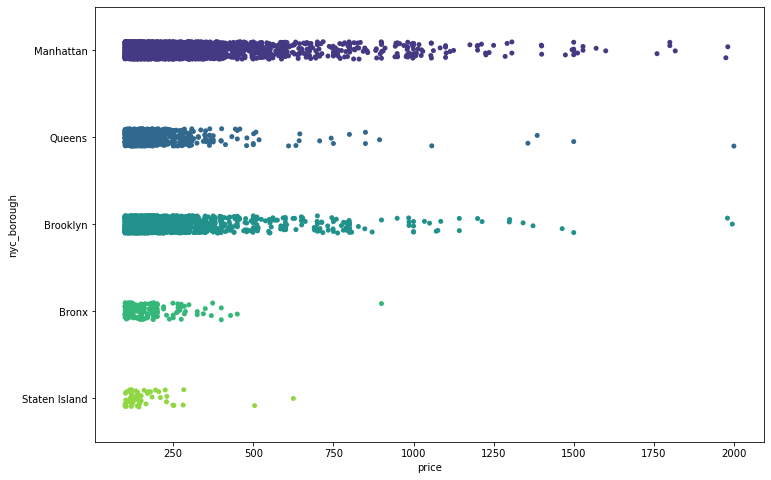

In [142]:
plt.figure(figsize=(12,8))
sns.stripplot(x='price', y='nyc_borough', data=df, jitter=True, dodge=True, palette='viridis')

### I wanted to include a plot with variables, 'price' and 'nyc_borough.'. Staten Island could be so low in numeric prices due to the lack of transportation at times, since one would need to get on a ferry from Staten Island to Manhattan. I also think Bronx also has low Airbnb prices due to the longevity of how long it takes to get to Manhatttan or any other borough - this can sometimes take 2 hours or more. Due to the history of NYC MTA Subway, my hypothesis in indicative of what I have read in articles and what I've seen in real time. 

In [175]:
df.loc[df['availability_365'] >= 250, 'Airbnb Availability'] = 'All Year Availability'

In [177]:
df.loc[(df['availability_365'] >= 9) & (df['availability_365'] < 10), 'Airbnb Availability'] = 'Low Availability'

In [173]:
df.loc[df['availability_365'] >= 0, 'Airbnb Availability'] = 'No Availability'

In [178]:
df['Airbnb Availability'].value_counts(dropna = False)

No Availability          4140
All Year Availability    2555
Low Availability           21
Name: Airbnb Availability, dtype: int64

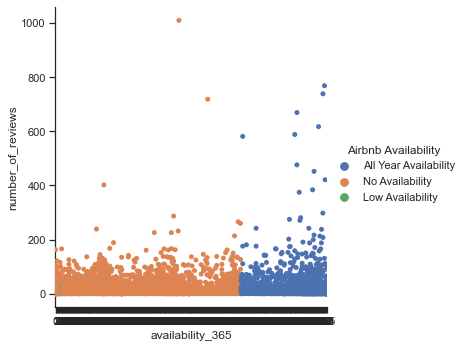

In [189]:
sns.set(style="ticks")
g = sns.catplot(x="availability_365", y="number_of_reviews", hue="Airbnb Availability", data=df)

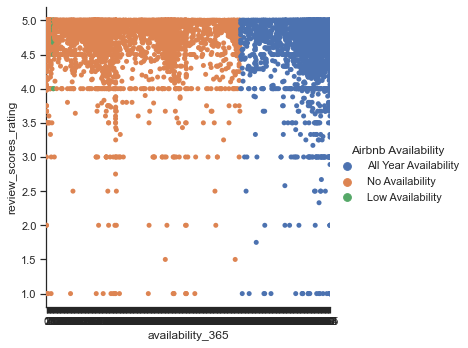

In [219]:
sns.set(style="ticks")
g = sns.catplot(x="availability_365", y="review_scores_rating", hue="Airbnb Availability", data=df)

### Using the categorical plot, I implemented a 'All Year/No/Low Availiability' as to whether availability within a year impacts the number of reviews. Based on the chart, I want to divulge this variable further since there is no clear indicative result. 

In [190]:
df.columns

Index(['host_id', 'host_since', 'host_response_time', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'nyc_neighbourhood',
       'nyc_borough', 'latitude', 'longitude', 'property_type', 'room_type',
       'property_accommodates', 'property_bathrooms', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_365', 'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'instant_bookable', 'Airbnb Availability'],
      dtype='object')

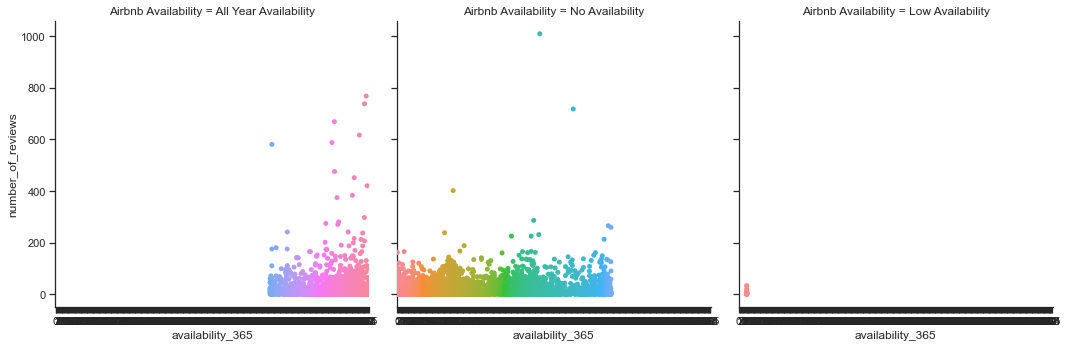

In [191]:
g = sns.catplot(x="availability_365", y="number_of_reviews",
                col="Airbnb Availability", bins = 20, data=df, )

## Does an Airbnb room type impact property prices?

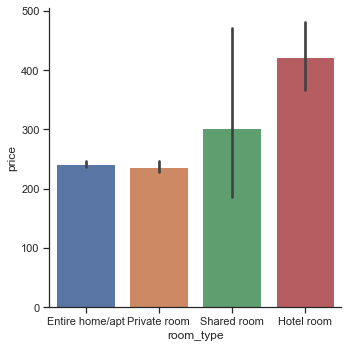

In [209]:
sns.catplot(x ='room_type', y ='price', data = df, kind ='bar')

### Hotel Rooms are more likely to be booked than entire homes/apartments due to the price. I will investigate this further in the next exercise since results might be skewed.  

## Which NYC borough has the highest Airbnb prices?

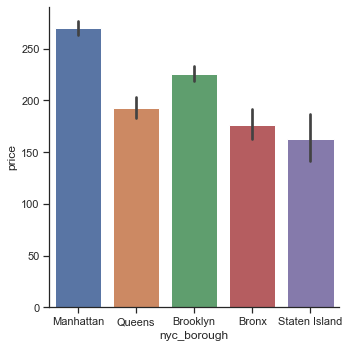

In [211]:
sns.catplot(x ='nyc_borough', y ='price', data = df, kind ='bar')

### Manhattan has the highest Airbnb prices, with Brooklyn coming in second.

## Does host reponse time affect booking? 

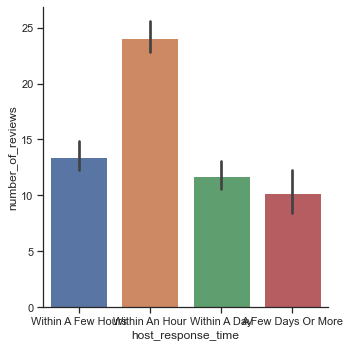

In [217]:
sns.catplot(x ='host_response_time', y ='number_of_reviews', data = df, kind ='bar')

### Response time can have an affect on bookings, you can see from the chart above - if a host responds within an hour, the property is more likely to be booked based on the number of reviews. 

## Which room type is most popular?

In [ ]:
sns.catplot(x ='room_type', y ='price', data = df, kind ='nyc_borough')

<AxesSubplot:xlabel='maximum_nights', ylabel='price'>

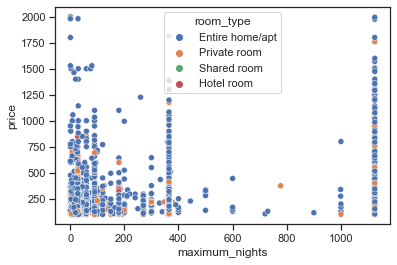

In [195]:
sns.scatterplot(x = 'maximum_nights', y = 'price', hue = 'room_type', data = df)

#### The caterogorical chart above indicates that people generally book an 'entire home/apartment' rather than a private, shared or hotel room. This can be due to privacy, accessbility to ameneties, or preference.  

## Does being a Superhost forsee higher prices? 

<AxesSubplot:xlabel='number_of_reviews', ylabel='price'>

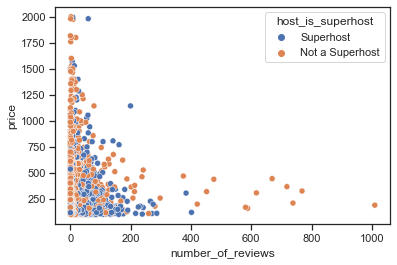

In [201]:
sns.scatterplot(x = 'number_of_reviews', y = 'price', hue = 'host_is_superhost', data = df)

### Based on the Airbnb information site, Superhosts' are more aligned with 'hospitality, not safety' measures. Airbnb has two levels of hosts - Superhost and Plus, where Plus is more indicative of a invitation type of setting by Airbnb administrators, and an Airbnb Superhost can be anyone signing up to lease their property to Airbnb. The results of these two variables range within each other. 

Source: https://www.airbnb.com/help/article/2521/the-difference-between-airbnb-plus-and-superhost

## Does an Airbnb hosts' verified identity affect nights booked?

<AxesSubplot:xlabel='maximum_nights', ylabel='price'>

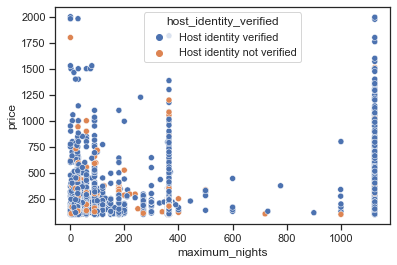

In [204]:
sns.scatterplot(x = 'maximum_nights', y = 'price', hue = 'host_identity_verified', data = df)

### According to the Help Centre on the UK version of Airbnb, 'When we ask for personal information, we take proper measures to protect it. We only verify the information you provide to help keep your account secure and to help prevent financial crimes.' More people book with Airbnb hosts who are verified. 

Source: https://www.airbnb.co.uk/help/article/3004/verifying-your-host-account

## Does a present Airbnb hosts' profile picture affect future bookings?

<AxesSubplot:xlabel='maximum_nights', ylabel='price'>

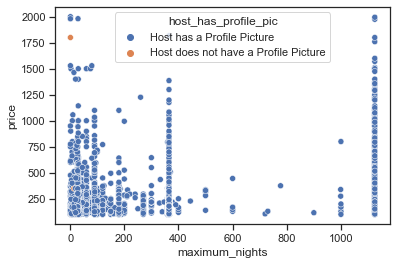

In [205]:
sns.scatterplot(x = 'maximum_nights', y = 'price', hue = 'host_has_profile_pic', data = df)

### Properties booked via Airbnb are properties that contain a profile picture of the Airbnb hosts. My hypothesis is, the general public trusts a host with a face picture for recognition purposes rather than one without. I belive if the person can put a name to the face, the person booking the property can amerliorate their decision making. 

## New Hypothesis: Is location indicative of price? 

### While this dataset focuses on the Airbnb hosts identity verification, property location, price and accomadations, I would like to focus as to what factors hosts set prices for their property? 

### I would also like to know whether the property type include more bathrooms? Can accomadate more people? Have more yearly availability for people to book? 